* Importing all the necessary libraries 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading csv excel file
df = pd.read_csv("hotel_booking_dataset.csv")

In [3]:
# Get top 5 rows of data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


* As from the above data we can say that out data is of classification type where my output column is is_canceled column with two values 0 and 1.

In [4]:
# Checking information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

* from the above information we can see that there are total 31 columns, also we can see that there are some null values presend in my dataset
* Also datatype can be seen as my 4 column has float datatype, 16 columns has integer datatype and 12 columns has object datatype.

In [5]:
# Checking description
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


* From the above description we can see total columns = 21, count of every numeric columns are same -> 119390 except one that is company column -> 6797.
* The columns lead_time, agent has big difference in mean and 50% data , which means it is not normally distributed.
* Rest columns shown above like arrival_date_year, arrival_date_week_number, arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights etc. have small or no difference in mean and 50% data. which shows they are normally distributed

In [6]:
# Shows description of only object column
df.describe(include= "object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,21/10/2015
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


* From above description of only object columns we can see count(119390), count unique values, top category, frequency of every column. 

In [7]:
# Checking shape of data
df.shape 

(119390, 32)

In [8]:
# Returns sum of null values in the columns
df.isna().sum() 

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

* As we can see that there are three columns which consist null values, so we will try to remove or if we do not find any realtion of the column with output column we will drop that input column.

In [9]:
df.duplicated().sum()

31994

In [10]:
df.drop_duplicates(inplace=True)

## Data Cleaning and Removing Outliers

In [11]:
# Converting reservation_status_date from object -> datetime format
df["reservation_status_date"] = pd.DatetimeIndex(df["reservation_status_date"])

In [12]:
## Dropping comapany and agent column because there were too many outliers present.
df.drop(["company","agent"], axis=1 ,inplace = True)
# Dropping null values if any
df.dropna(inplace=True)

* Dropping columns which do not have any relation with target column/output and consist of more outliers, by removing those we will loose many of our data.

In [13]:
# head() -> Prints top 5 rows data for all columns.
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-03-07


In [14]:
## Returns sum of all null values.
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

* As we can see that there are no null values present in our dataset.

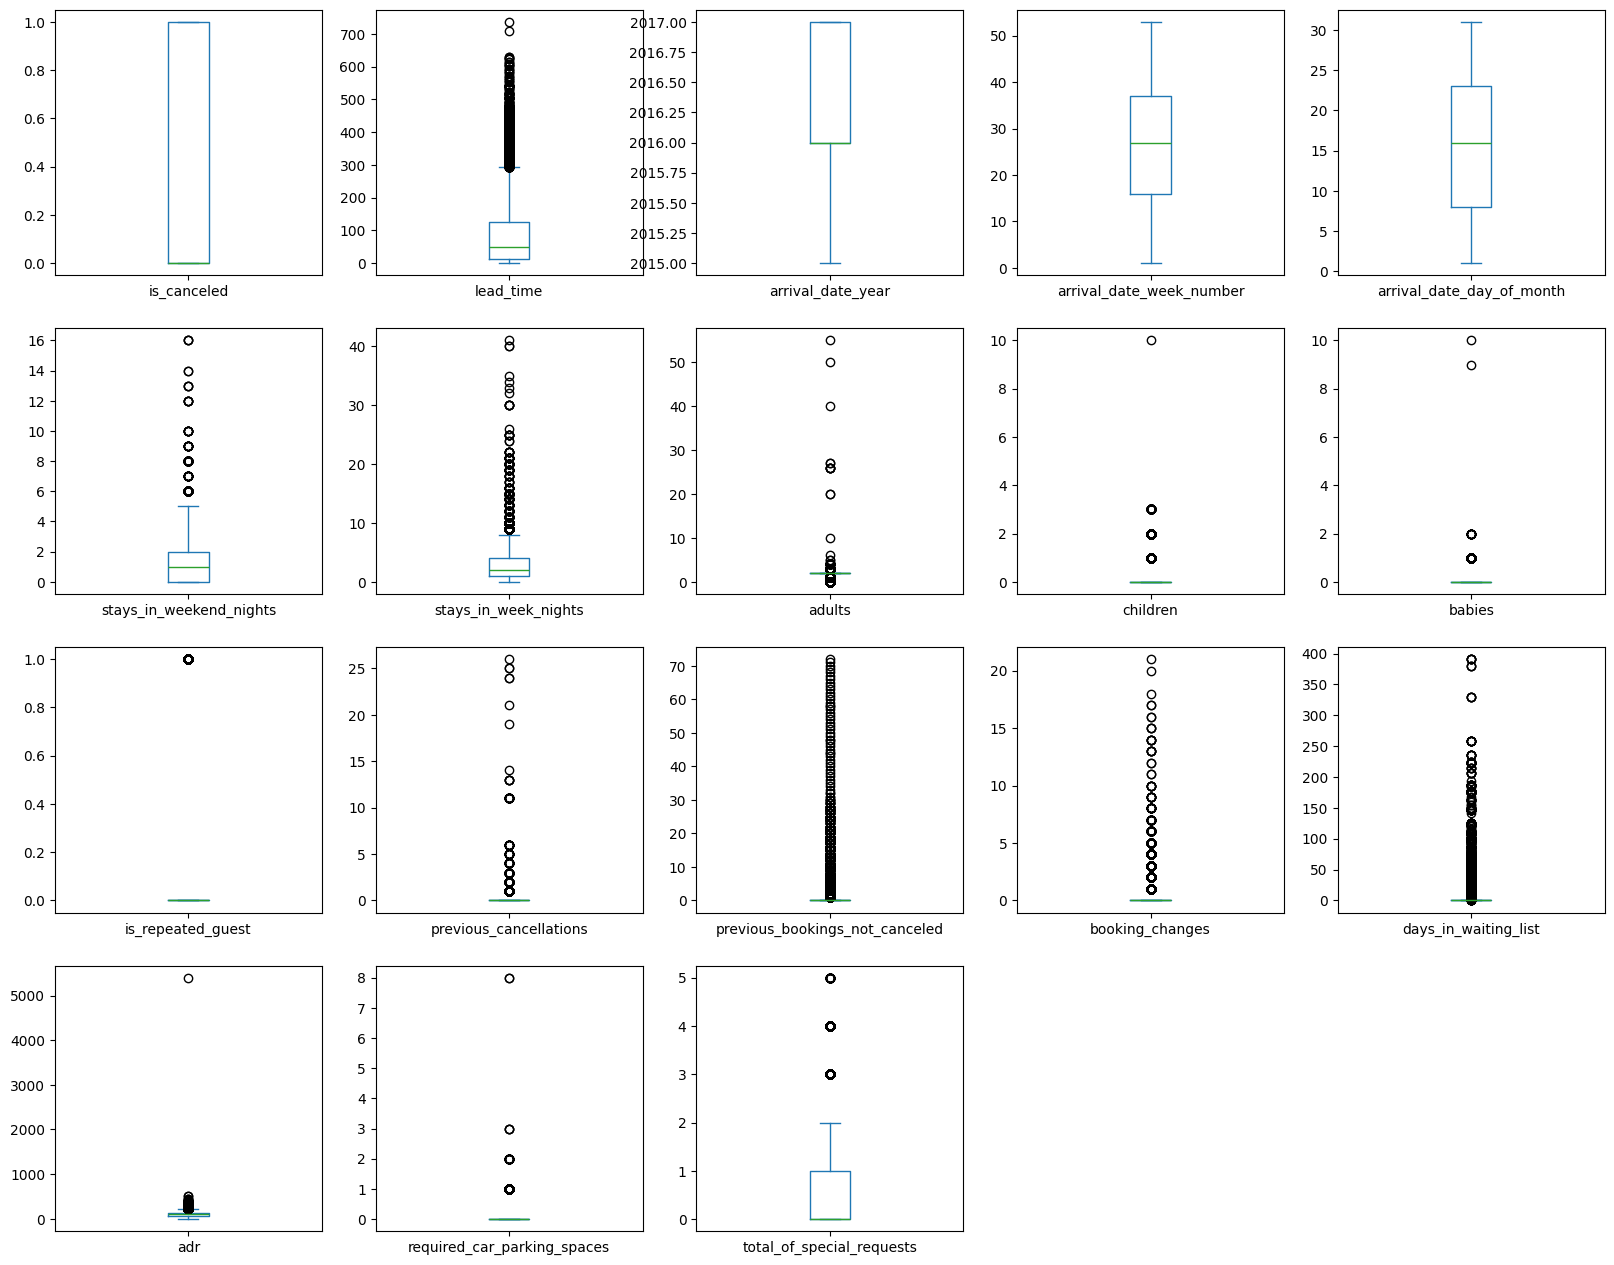

In [15]:
## Plotting box plot after dropping the columns.
df.plot(kind = "box", subplots=True,layout = (5,5), figsize = (20,20))
plt.show()

* from the above plot we can see that there many columns which consists of outliers, so we will remove thoese outliers.

## Working on Lead Time 

<Axes: >

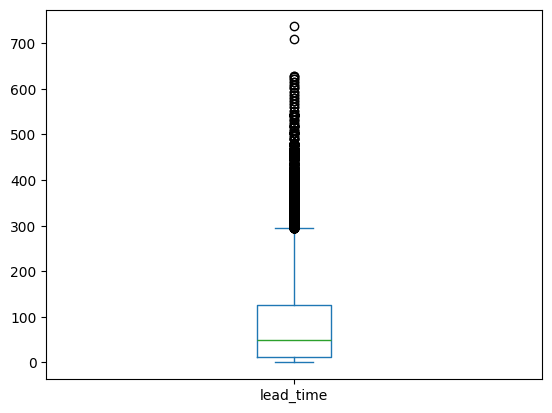

In [16]:
## Plotting box plot to see outliers in the column.
df["lead_time"].plot.box()

In [17]:
## Checking quantile value to remove outliers
df["lead_time"].quantile(0.98)

316.0

In [18]:
## Applying filter to remove outliers and taking values of lead time <= 320 and saving that data again in df.
df = df[df["lead_time"]<=320]

<Axes: >

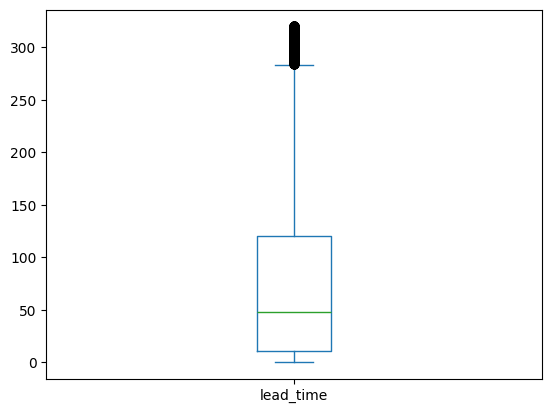

In [19]:
## Plotting box plot after removing outliers
df["lead_time"].plot.box()

In [20]:
## Checking shape of the lead_time column
df["lead_time"].shape

(85385,)

## Working on Stays In Weekend Nights

<Axes: >

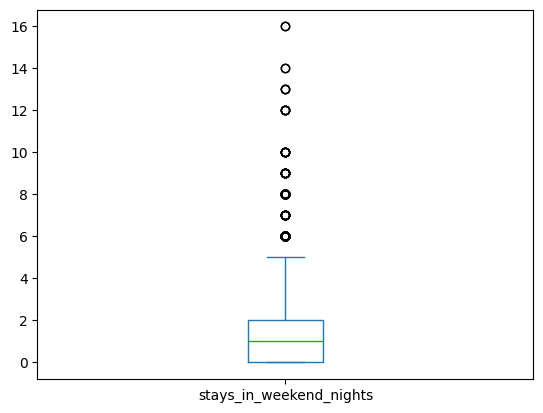

In [21]:
## Plotting box plot to see outliers in the column.
df["stays_in_weekend_nights"].plot.box()

In [22]:
## Checking quantile value to remove outliers
df["stays_in_weekend_nights"].quantile(0.99)

4.0

In [23]:
## Applying filter to remove outliers and taking values of stays_in_weekend_nights <= 4 and saving that data again in df.
df = df[df["stays_in_weekend_nights"]<=4]

<Axes: >

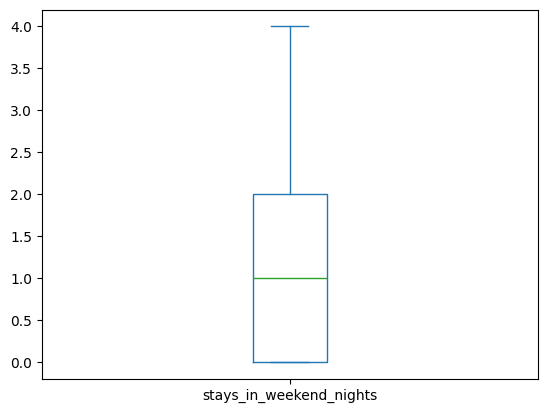

In [24]:
## Plotting box plot after removing outliers
df["stays_in_weekend_nights"].plot.box()

In [25]:
## Checking shape of the stays_in_weekend_nights column
df["stays_in_weekend_nights"].shape

(85105,)

## Working on Stays In Week Nights


<Axes: >

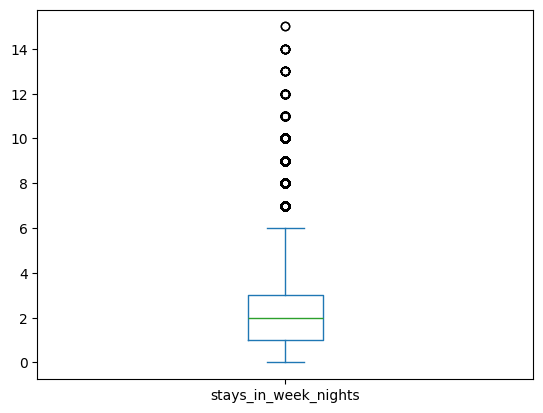

In [26]:
## Plotting box plot to see outliers in the column.
df["stays_in_week_nights"].plot.box()

In [27]:
## Checking quantile value to remove outliers
df["stays_in_week_nights"].quantile(0.97)

7.0

In [28]:
## Applying filter to remove outliers and taking values of stays_in_week_nights <= 6 and saving that data again in df.
df = df[df["stays_in_week_nights"]<=6]

<Axes: >

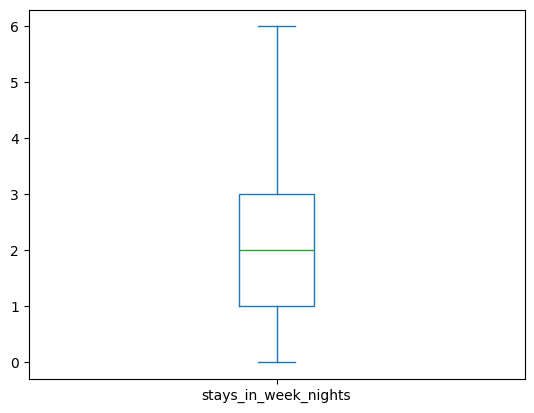

In [29]:
## Plotting box plot after removing outliers
df["stays_in_week_nights"].plot.box()

In [30]:
## Checking shape of the stays_in_weekend_nights column
df["stays_in_week_nights"].shape

(82455,)

## Working on Adults Column

<Axes: >

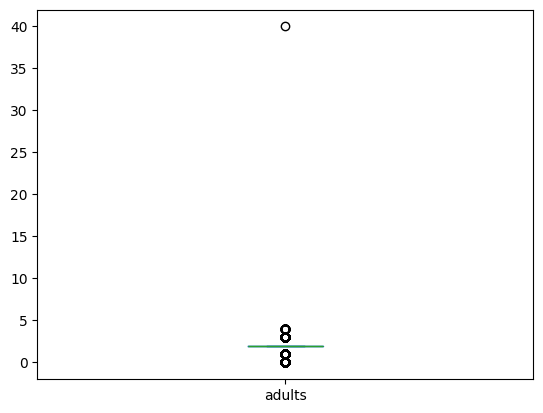

In [31]:
## Plotting box plot to see outliers in the column.
df["adults"].plot.box()

In [32]:
## Checking quantile value to remove outliers
df["adults"].quantile(0.94)

3.0

In [33]:
## Applying filter to remove outliers and taking values of adults <=2.5 and saving that data again in df.
df = df[df["adults"]<=2.5]

<Axes: >

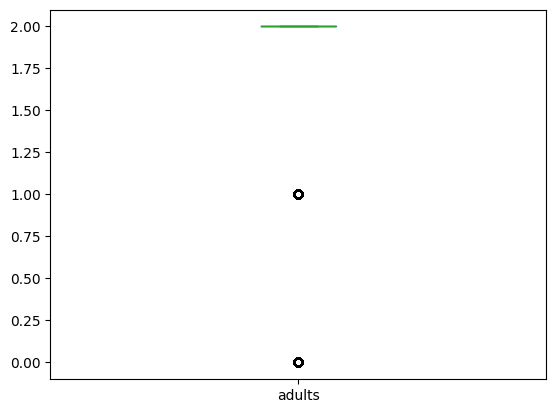

In [34]:
## Plotting box plot after removing outliers.
df["adults"].plot.box()

In [35]:
## Checking shape after removing outliers, how many data we have in adults column.
df["adults"].shape

(76667,)

In [36]:
## Checking overall shape of the data frame
df.shape

(76667, 30)

## Working on Childern Column

<Axes: >

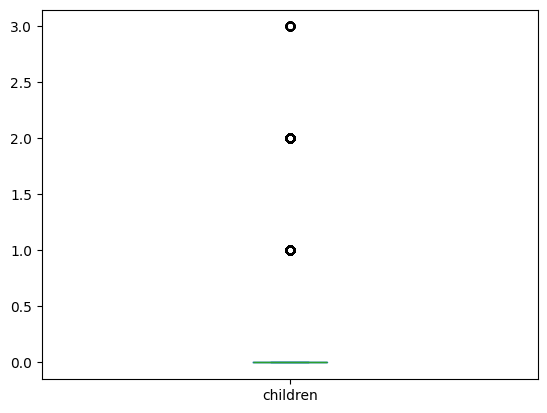

In [37]:
## Plotting box plot to see outliers in the column.
df["children"].plot.box()

In [38]:
## Checking quantile value to remove outliers
df["children"].quantile(0.95)

1.0

In [39]:
## Applying filter to remove outliers and taking values ofchildren <= 1 and saving that data again in df.
df = df[df["children"]<=1]

<Axes: >

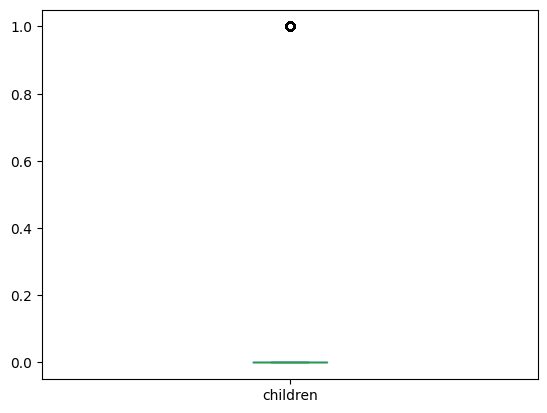

In [40]:
## Plotting box plot after removing outliers.
df["children"].plot.box()

In [41]:
## Checking overall shape of the data frame
df.shape

(73218, 30)

## Working on Babies Column

<Axes: >

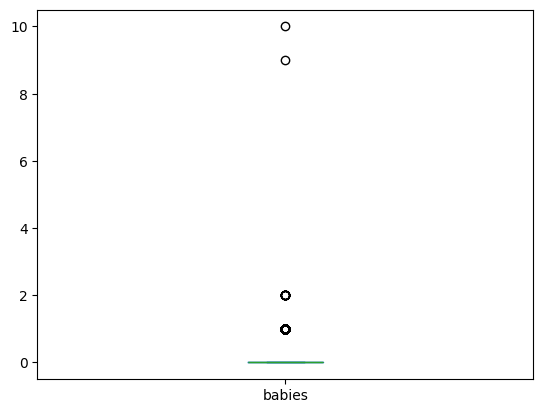

In [42]:
## Plotting box plot to see outliers in the column.
df["babies"].plot.box()

In [43]:
## Checking quantile value to remove outliers
df["babies"].quantile(0.99)

1.0

In [44]:
## Applying filter to remove outliers and taking values of babies <= 0 and saving that data again in df.
df = df[df["babies"]<=0]

<Axes: >

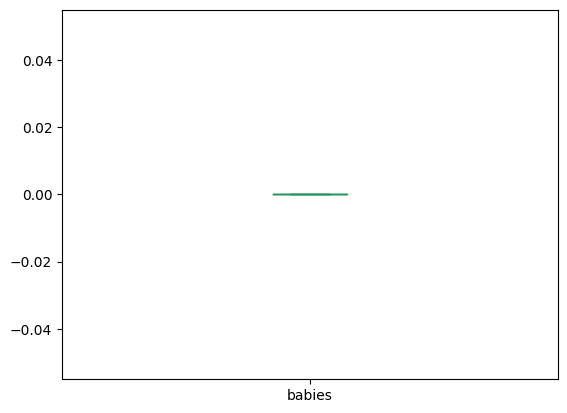

In [45]:
## Plotting box plot after removing outliers.
df["babies"].plot.box()

## Working on Previous Cancellation Column

<Axes: >

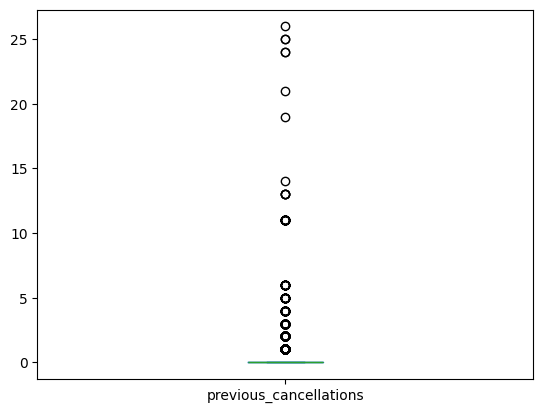

In [46]:
## Plotting box plot to see outliers in the column.
df["previous_cancellations"].plot.box()

In [47]:
## Checking quantile value to remove outliers
df["previous_cancellations"].quantile(0.95)

0.0

In [48]:
## Applying filter to remove outliers and taking values of previous_cancellations <= 1 and saving that data again in df.
df = df[df["previous_cancellations"]<=1]

<Axes: >

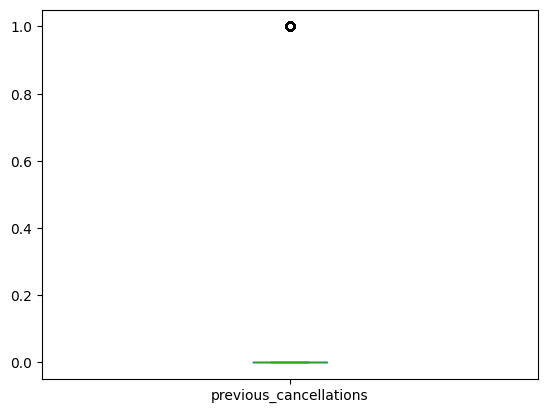

In [49]:
## Plotting box plot after removing outliers.
df["previous_cancellations"].plot.box()

In [50]:
## Checking overall shape of the data frame
df.shape

(72121, 30)

## Working on Previous Bookings not Cancelled

<Axes: >

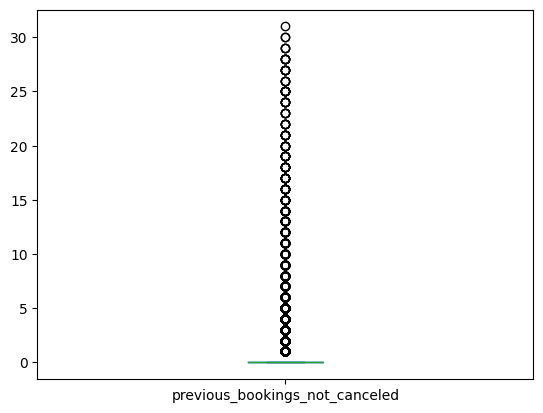

In [51]:
## Plotting box plot to see outliers in the column.
df["previous_bookings_not_canceled"].plot.box()

In [52]:
## Checking quantile value to remove outliers
df["previous_bookings_not_canceled"].quantile(0.95)

0.0

In [53]:
## Applying filter to remove outliers and taking values of previous_bookings_not_canceled<= 0 and saving that data again in df.
df = df[df["previous_bookings_not_canceled"]<=0]

<Axes: >

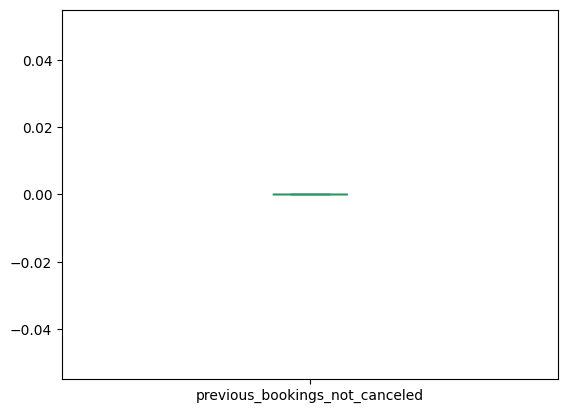

In [54]:
## Plotting box plot after removing outliers.
df["previous_bookings_not_canceled"].plot.box()

In [55]:
## Checking overall shape of the data frame
df.shape

(69204, 30)

## Working on Booking Changes

<Axes: >

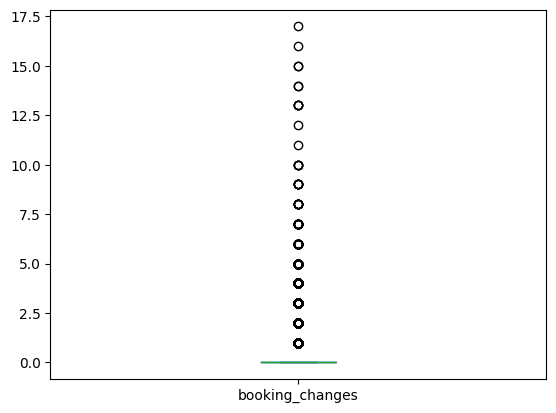

In [56]:
## Plotting box plot to see outliers in the column.
df["booking_changes"].plot.box()

In [57]:
## Checking quantile value to remove outliers
df["booking_changes"].quantile(0.95)

2.0

In [58]:
## Applying filter to remove outliers and taking values of booking_changes<= 1.0 and saving that data again in df.
df = df[df["booking_changes"]<= 1.0]

<Axes: >

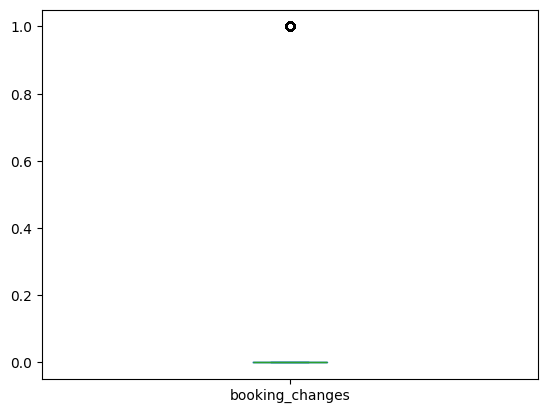

In [59]:
## Plotting box plot after removing outliers.
df["booking_changes"].plot.box()

In [60]:
## Checking overall shape of the data frame
df.shape

(65604, 30)

## Working on Days In Waiting List

<Axes: >

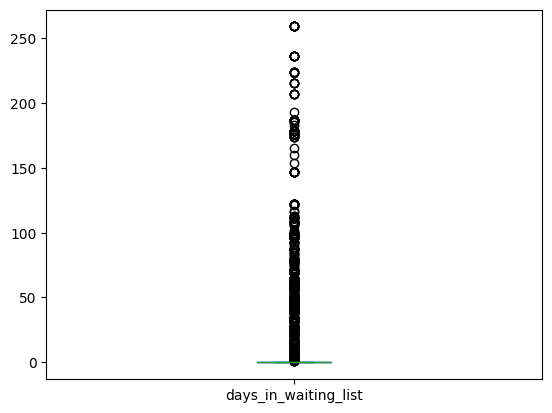

In [61]:
## Plotting box plot to see outliers in the column.
df["days_in_waiting_list"].plot.box()

In [62]:
## Checking quantile value to remove outliers
df["days_in_waiting_list"].quantile(0.92)

0.0

In [63]:
## Applying filter to remove outliers and taking values of days_in_waiting_list<= 0 and saving that data again in df.
df = df[df["days_in_waiting_list"]<=0]

<Axes: >

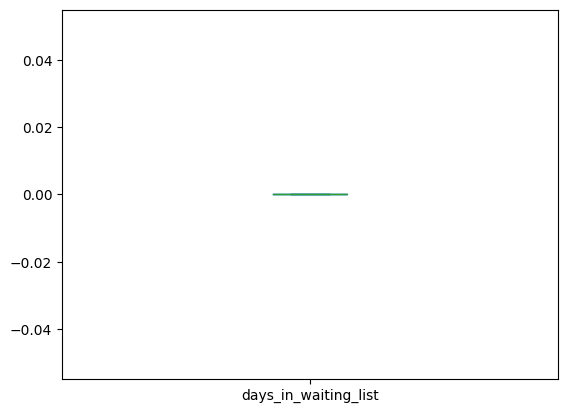

In [64]:
## Plotting box plot after removing outliers.
df["days_in_waiting_list"].plot.box()

In [65]:
## Checking overall shape of the data frame
df.shape

(64964, 30)

In [66]:
## Info prints information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64964 entries, 2 to 119388
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           64964 non-null  object        
 1   is_canceled                     64964 non-null  int64         
 2   lead_time                       64964 non-null  int64         
 3   arrival_date_year               64964 non-null  int64         
 4   arrival_date_month              64964 non-null  object        
 5   arrival_date_week_number        64964 non-null  int64         
 6   arrival_date_day_of_month       64964 non-null  int64         
 7   stays_in_weekend_nights         64964 non-null  int64         
 8   stays_in_week_nights            64964 non-null  int64         
 9   adults                          64964 non-null  int64         
 10  children                        64964 non-null  float64       
 11  babies

* From the above information we can see that there are total 29 columns left after dropping some columns, no null values present in my data and range of my dataset is 89041.
* Also datatype can be seen as my 2 column has float datatype, 16 columns has integer datatype, 1 column has datetime dtype and 11 columns has object datatype.

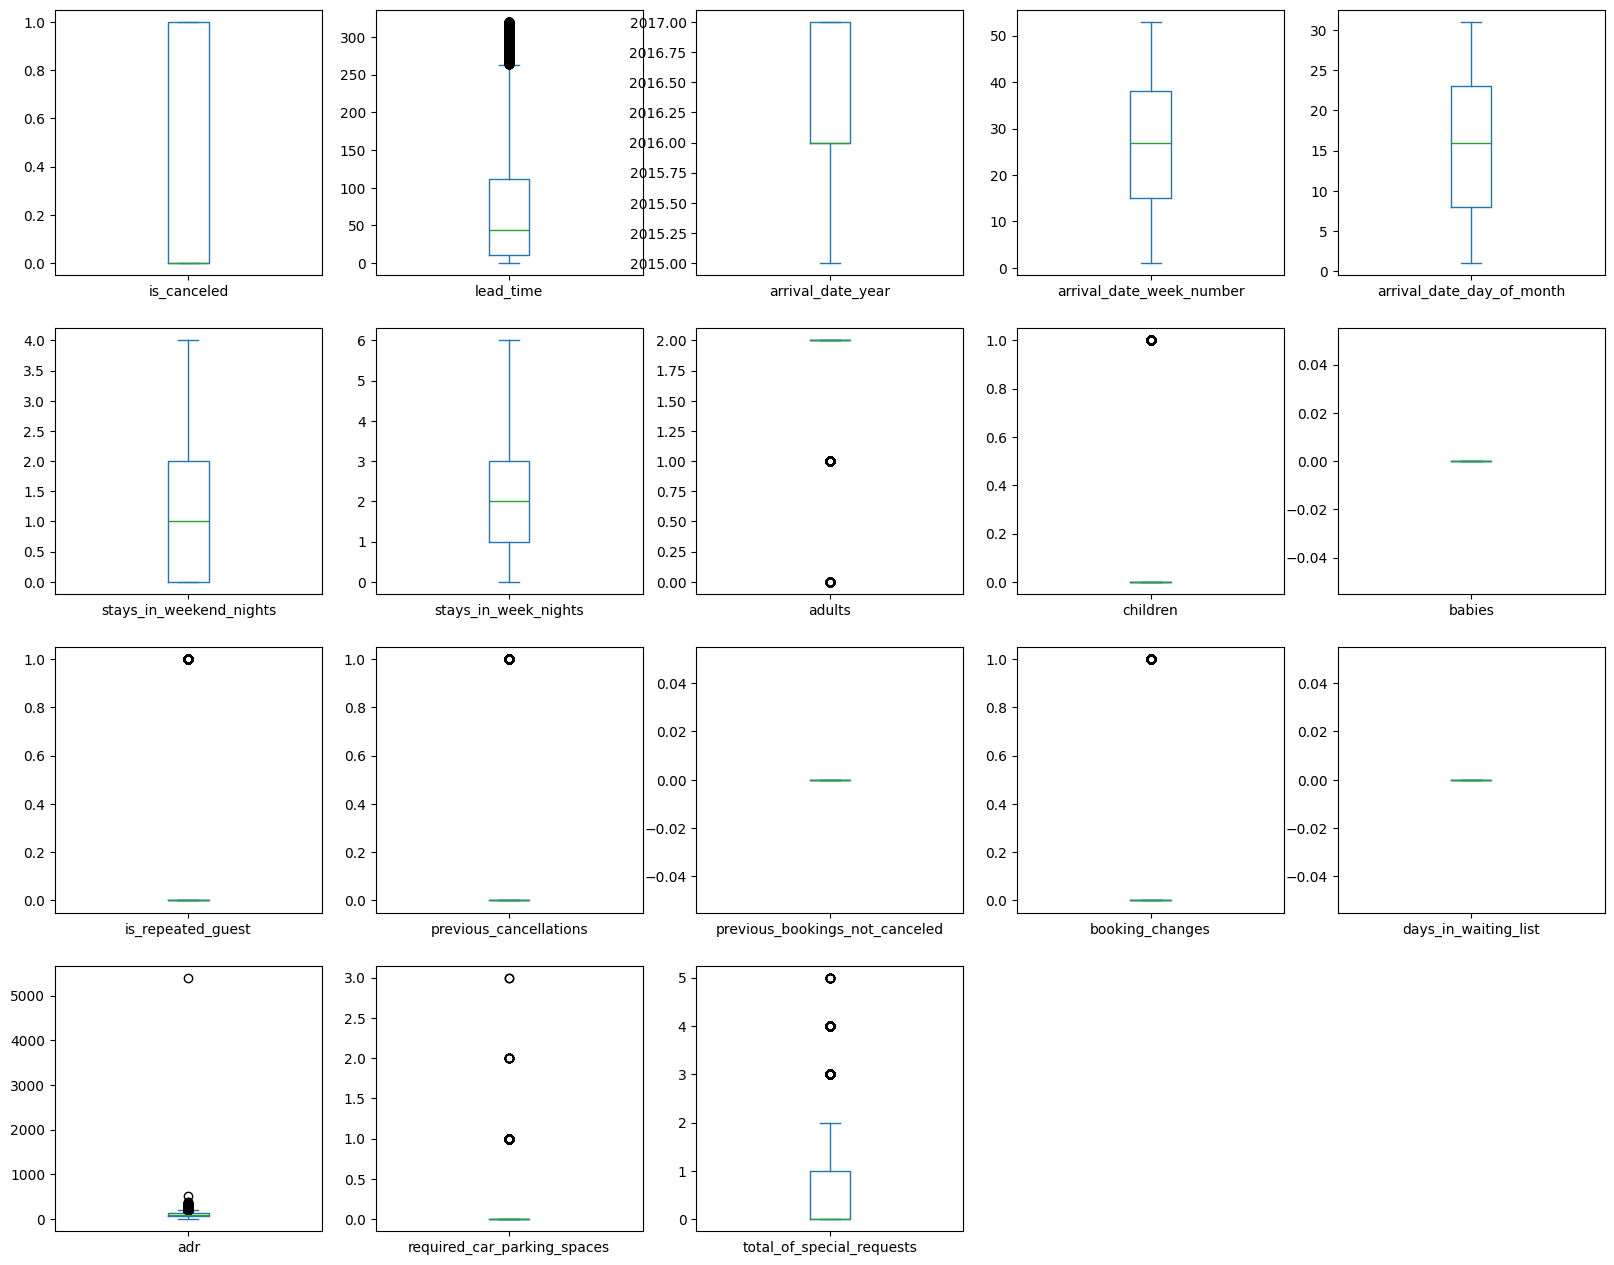

In [67]:
## Plotting box plot of all the column with numeric datatype.
df.plot(kind = "box", subplots=True,layout = (5,5), figsize = (20,20))
plt.show()

* As we can see that from the above box plot that some columns still have some outliers, but we will neglect those outliers because removing those outliers can remove most of our data.

# 3.Data Analysis and Visualizations

In [68]:
## Using value_counts to check count of unique values of is_canceled column
df["is_canceled"].value_counts()

is_canceled
0    47220
1    17744
Name: count, dtype: int64

In [69]:
## Using normalize in value_counts we can directly check the percentage instead of count 
cancelled_perc = df['is_canceled'].value_counts(normalize = True)
cancelled_perc

is_canceled
0    0.726864
1    0.273136
Name: proportion, dtype: float64

* Here we can see that 64% of reservations are not cancelled and 36% of reservations are cancelled

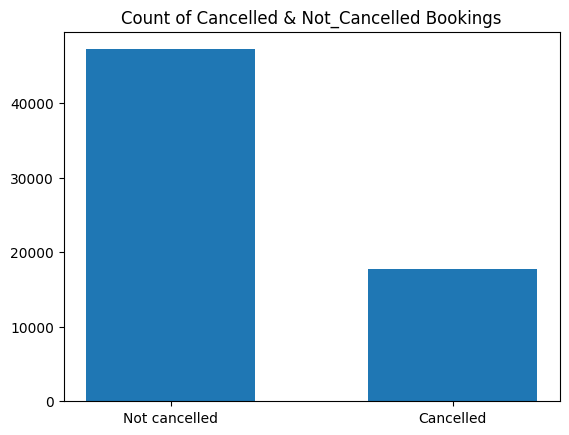

In [70]:
## Plotting bar plot to see the count of output column(is_canceled)
plt.title("Count of Cancelled & Not_Cancelled Bookings")
plt.bar(["Not cancelled","Cancelled"],df["is_canceled"].value_counts(),width=0.6)
plt.show()

* From above bar plot we can see that the not cancelled values are more than cancelled values.

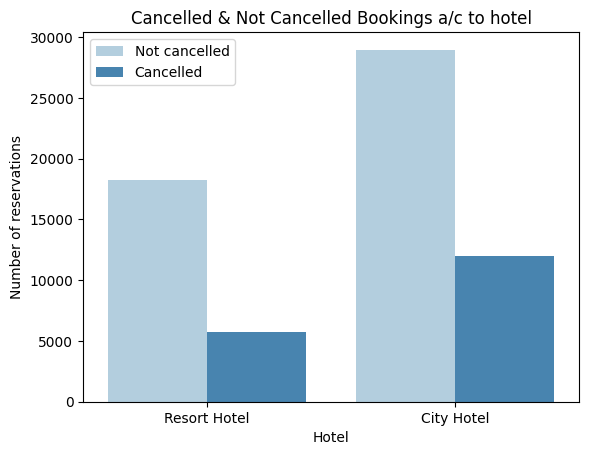

In [71]:
## Plotting countplot to see relation between hotel column and is_canceled column.
sns.countplot(x='hotel',hue = 'is_canceled',data= df , palette="Blues")
plt.title("Cancelled & Not Cancelled Bookings a/c to hotel")
plt.xlabel('Hotel')
plt.ylabel('Number of reservations')
plt.legend(['Not cancelled','Cancelled'])
plt.show()

* From above count plot we can see that in resort hotel count of not_cancelled is more than cancelled,
* Whereas in city hotel count of not_cancelled is more than cancelled.

In [72]:
## using value_count to check count of unique values of hotel column.
df['hotel'].value_counts()

hotel
City Hotel      40956
Resort Hotel    24008
Name: count, dtype: int64

In [73]:
df.reset_index(drop = True, inplace =True)

In [74]:
## Checking relation between hotel column and adr column
df.groupby("hotel")["adr"].mean()

hotel
City Hotel      105.233616
Resort Hotel     93.628793
Name: adr, dtype: float64

* From above relation we can see that mean of adr of city hotel is greater than resort hotel.

### Applying Hypothesis Testing

In [75]:
## using value_count to check count of unique values of hotel column.
df["hotel"].value_counts()

hotel
City Hotel      40956
Resort Hotel    24008
Name: count, dtype: int64

In [76]:
## Splitting data by its index value for city and resort hotel.
city_hotel = df[df["hotel"] == "City Hotel"].index
resort_hotel = df[df["hotel"] == "Resort Hotel"].index

In [77]:
## Displays index value of city hotel data
city_hotel

Index([24008, 24009, 24010, 24011, 24012, 24013, 24014, 24015, 24016, 24017,
       ...
       64954, 64955, 64956, 64957, 64958, 64959, 64960, 64961, 64962, 64963],
      dtype='int64', length=40956)

In [78]:
## Displays index value of resort hotel data
resort_hotel

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       23998, 23999, 24000, 24001, 24002, 24003, 24004, 24005, 24006, 24007],
      dtype='int64', length=24008)

In [79]:
## Picking 1500 random sample data from city and resort hotel 
city_sample = np.random.choice(city_hotel, 1500)
resort_sample = np.random.choice(resort_hotel, 1500)

In [80]:
city_sample = df.iloc[city_sample]["adr"]
resort_sample = df.iloc[resort_sample]["adr"]

In [81]:
## Finding mean and standard deviation of city and resort hotel.
city_mean = city_sample.mean()
city_std = city_sample.std()
resort_mean = resort_sample.mean()
resort_std = resort_sample.std()
city_mean, city_std, resort_mean,resort_std

(103.13381999999999, 35.174538641656255, 97.12806666666667, 60.06332706097772)

In [82]:
## taking sample size - 1500
n = 1500

In [83]:
## Applying T- test for two sample 
p_val = (city_mean - resort_mean)/np.sqrt((city_std**2/n)+ (resort_std**2/n))

In [84]:
p_val

3.3417417830128437

* The p value is greater than 1.65, hence the difference in mean of adr is significant.

## Cancelled Bookings within months

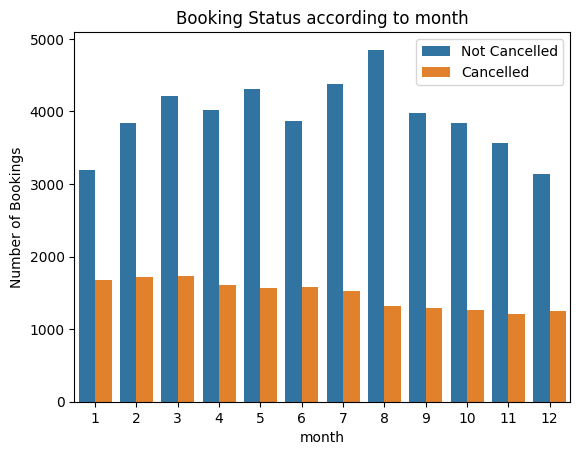

In [85]:
## Plotting countplot to see the count of output column(is_canceled) on monthly basis.
df['month'] = df['reservation_status_date'].dt.month
sns.countplot(x = 'month', hue = 'is_canceled',data=df)
plt.xlabel("month")
plt.title("Booking Status according to month")
plt.ylabel("Number of Bookings")
plt.legend(["Not Cancelled","Cancelled"])
plt.show()

* From above countplot we can see that the count of not canceled is more in every month except "1st" i.e. January

In [86]:
## Applying cross tab to get the count of not_canceled and canceled on the basis of meal.
## Cross tab is use to count the observation present in the categorical variable.
pd.crosstab(df["meal"], df["is_canceled"])

is_canceled,0,1
meal,,
BB,36755,12888
FB,154,71
HB,4404,1644
SC,5648,3083
Undefined,259,58


* From above analysis we can see that majority of not cancelled and cancelled are in BB meals.

In [87]:
## Applying cross tab to get the count of city hotel and resort hotel on the basis of meal.
pd.crosstab(df["meal"], df["hotel"])

hotel,City Hotel,Resort Hotel
meal,,
BB,30365,19278
FB,6,219
HB,1885,4163
SC,8700,31
Undefined,0,317


* From above analysis we can see that majority of not canceled and canceled are in BB meals.

In [88]:
## Using value_count to check count of unique values of month column.
df["month"].value_counts()

month
8     6177
3     5943
7     5911
5     5873
4     5626
2     5556
6     5461
9     5272
10    5115
1     4864
11    4784
12    4382
Name: count, dtype: int64

* From above value_count of month column we can see that there are total 12 categories present and datatype is integer.

In [89]:
## Using value_count to check count of unique values of market_segment column.
df['market_segment'].value_counts()

market_segment
Online TA        40201
Offline TA/TO    10494
Direct            8433
Groups            3189
Corporate         2098
Complementary      406
Aviation           143
Name: count, dtype: int64

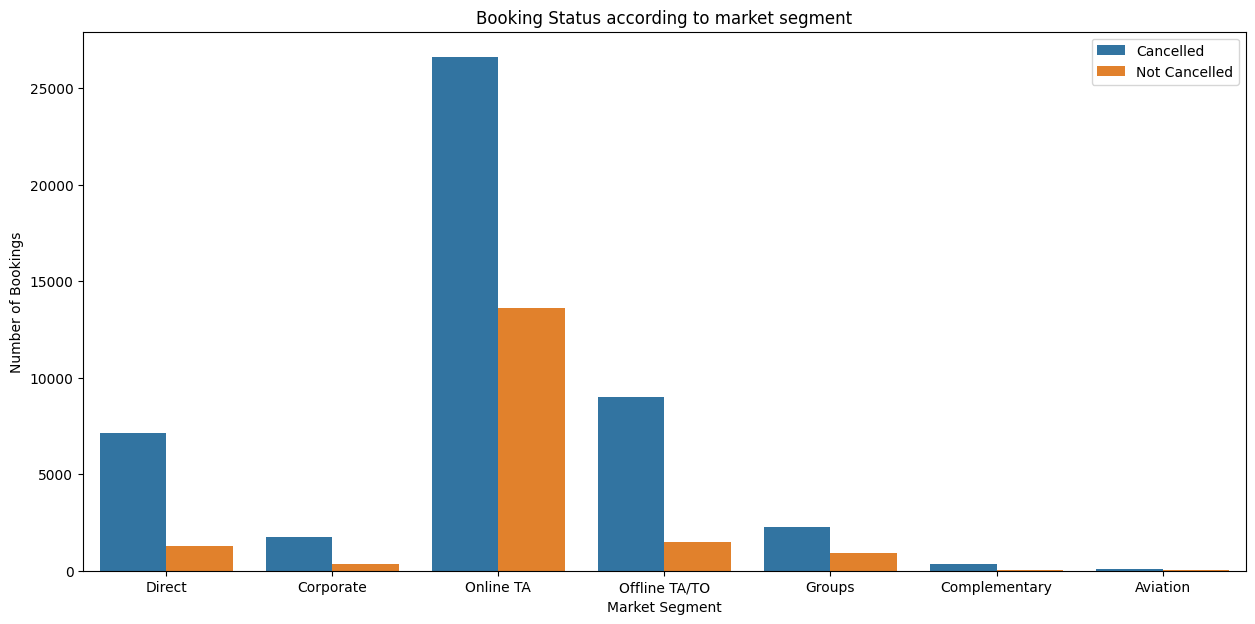

In [90]:
## Plotting countplot to see the count of output column(is_canceled) on the basis of market_segment
plt.figure(figsize=(15,7))
sns.countplot(df, x="market_segment",hue='is_canceled')
plt.title("Booking Status according to market segment")
plt.xlabel("Market Segment")
plt.ylabel("Number of Bookings")
plt.legend(["Cancelled","Not Cancelled"])
plt.show()

* From above analysis we can see that count of canceled and not_canceled is more in Online TA.

In [91]:
## Returns top 5 rows
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
0,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07,2
1,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07,2
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-03-07,3
3,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,107.0,0,0,Check-Out,2015-03-07,3
4,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,103.0,0,1,Check-Out,2015-03-07,3


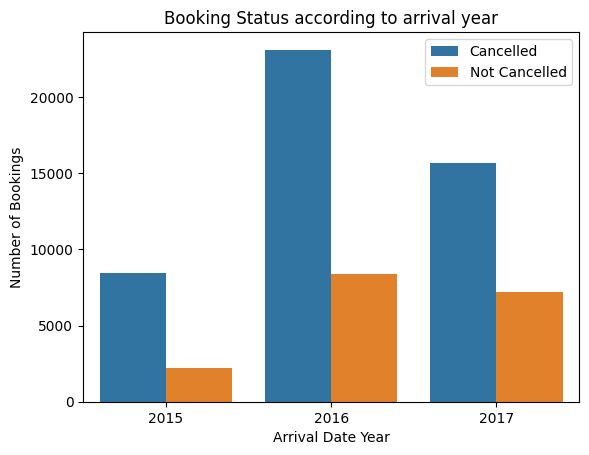

In [92]:
## Plotting countplot to see the count of output column(is_canceled) on the basis of arrival_date_year
sns.countplot(df, x="arrival_date_year",hue="is_canceled")
plt.title("Booking Status according to arrival year")
plt.xlabel("Arrival Date Year")
plt.ylabel("Number of Bookings")
plt.legend(["Cancelled","Not Cancelled"])
plt.show()

* From above analysis we can see that count of not_cancelled is more every year and among all the years the highest count of cancelled and not cancelled is in year 2016.

In [93]:
## Using value_count to check count of unique values of arrival_date_month.
df["arrival_date_year"].value_counts()

arrival_date_year
2016    31463
2017    22872
2015    10629
Name: count, dtype: int64

In [94]:
## Checking percantage using normalize 
df["arrival_date_year"].value_counts(normalize=True)

arrival_date_year
2016    0.484314
2017    0.352072
2015    0.163614
Name: proportion, dtype: float64

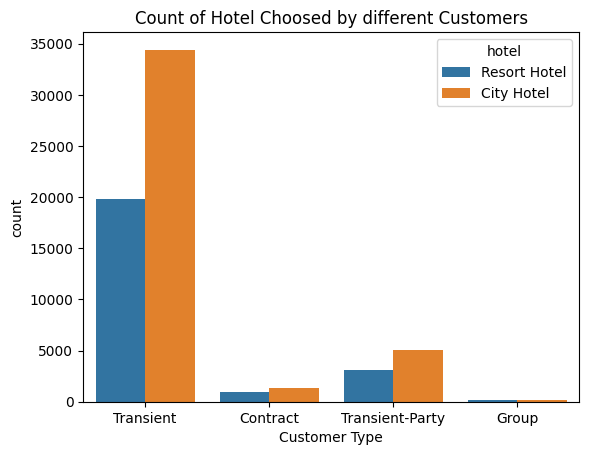

In [95]:
## Plotting countplot of customer_type and hotel
sns.countplot(df,x="customer_type",hue="hotel")
plt.title("Count of Hotel Choosed by different Customers")
plt.xlabel("Customer Type")
plt.show()

 * From above analysis we can see that count of city_hotel is more in each customer_type and highest count is for transient customer_type.

In [96]:
## Using value_count to check count of unique values of arrival_date_month.
df["customer_type"].value_counts()

customer_type
Transient          54208
Transient-Party     8182
Contract            2270
Group                304
Name: count, dtype: int64

In [97]:
## Checking percantage using normalize 
df["customer_type"].value_counts(normalize=True)

customer_type
Transient          0.834431
Transient-Party    0.125947
Contract           0.034942
Group              0.004680
Name: proportion, dtype: float64

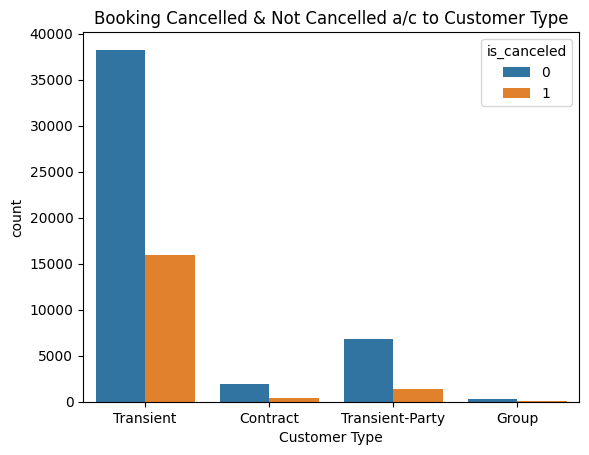

In [98]:
## Plotting countplot for customer_type and is_canceled
sns.countplot(df,x="customer_type",hue="is_canceled")
plt.title("Booking Cancelled & Not Cancelled a/c to Customer Type")
plt.xlabel("Customer Type")
plt.show()

 * From above analysis we can see that count of not_canceled is more in each customer_type and highest count is for transient customer_type.

In [99]:
## Returns information of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64964 entries, 0 to 64963
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           64964 non-null  object        
 1   is_canceled                     64964 non-null  int64         
 2   lead_time                       64964 non-null  int64         
 3   arrival_date_year               64964 non-null  int64         
 4   arrival_date_month              64964 non-null  object        
 5   arrival_date_week_number        64964 non-null  int64         
 6   arrival_date_day_of_month       64964 non-null  int64         
 7   stays_in_weekend_nights         64964 non-null  int64         
 8   stays_in_week_nights            64964 non-null  int64         
 9   adults                          64964 non-null  int64         
 10  children                        64964 non-null  float64       
 11  ba

In [100]:
## Returns top 5 rows of the data frame
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
0,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07,2
1,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07,2
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-03-07,3
3,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,107.0,0,0,Check-Out,2015-03-07,3
4,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,103.0,0,1,Check-Out,2015-03-07,3


In [101]:
## Using value_count to check count of unique values of deposit_type
df["deposit_type"].value_counts()

deposit_type
No Deposit    64325
Non Refund      573
Refundable       66
Name: count, dtype: int64

In [102]:
## Dropping deposit type column, because data was too biased towards No_deposit.
df.drop(["deposit_type"],axis=1,inplace=True)

In [103]:
## Dropping columns days_in_waiting_list, required_car_parking_spaces, total_of_special_requests as these columns are biased.
df.drop(["days_in_waiting_list","required_car_parking_spaces","total_of_special_requests"],axis=1,inplace=True)

In [104]:
## Returns top 5 rows of the data frame
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,customer_type,adr,reservation_status,reservation_status_date,month
0,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,A,C,0,Transient,75.0,Check-Out,2015-02-07,2
1,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,A,A,0,Transient,75.0,Check-Out,2015-02-07,2
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,A,A,0,Transient,98.0,Check-Out,2015-03-07,3
3,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,0,C,C,0,Transient,107.0,Check-Out,2015-03-07,3
4,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,0,C,C,0,Transient,103.0,Check-Out,2015-03-07,3


In [105]:
## Using value_count to check count of unique values of assigned_room_type column.
df["assigned_room_type"].value_counts()

assigned_room_type
A    38709
D    15721
E     5055
F     1718
B     1309
C     1085
G      782
I      225
K      199
H      160
P        1
Name: count, dtype: int64

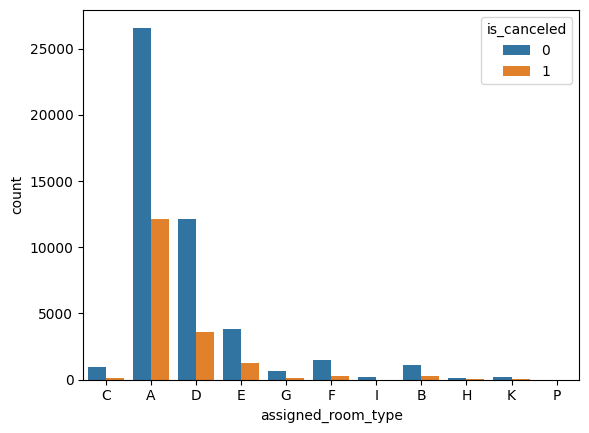

In [106]:
## Plotting countplot for assigned room type and is_canceled
sns.countplot(df,x="assigned_room_type",hue="is_canceled")
plt.show()

* From above analysis we can see that count of not_canceled is more in each assigned_room_type and highest count is for A,D,E category of room types.

In [107]:
## Dropping assigned room type because there is no relation with target column
df.drop(["assigned_room_type"],axis=1,inplace=True)

In [108]:
## Using value_count to check count of unique values of previous_cancellations.
df["previous_cancellations"].value_counts()

previous_cancellations
0    64171
1      793
Name: count, dtype: int64

In [109]:
## Using value_count to check count of unique values of previous_cancellations.
df["previous_bookings_not_canceled"].value_counts()

previous_bookings_not_canceled
0    64964
Name: count, dtype: int64

<Axes: xlabel='previous_cancellations', ylabel='count'>

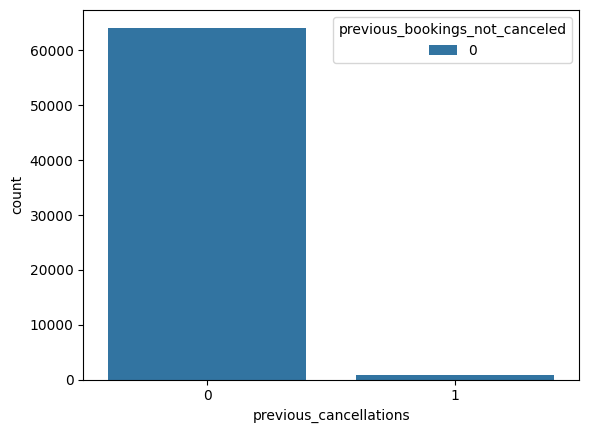

In [110]:
## Plotting count plot for previous cancellations and previous_bookings_not_canceled
sns.countplot(df,x="previous_cancellations",hue="previous_bookings_not_canceled")

* From above analysis we can see that the data is fully biased towards not canceled while comparing previous_cancellations and previous_bookings_not_canceled.

In [111]:
## Dropping column previous_cancellations, previous_bookings_not_canceled because 
# ,it is too biased and there is no relation with target column.
df.drop(["previous_cancellations","previous_bookings_not_canceled"],axis=1,inplace=True)


In [112]:
## Info gives information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64964 entries, 0 to 64963
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   hotel                      64964 non-null  object        
 1   is_canceled                64964 non-null  int64         
 2   lead_time                  64964 non-null  int64         
 3   arrival_date_year          64964 non-null  int64         
 4   arrival_date_month         64964 non-null  object        
 5   arrival_date_week_number   64964 non-null  int64         
 6   arrival_date_day_of_month  64964 non-null  int64         
 7   stays_in_weekend_nights    64964 non-null  int64         
 8   stays_in_week_nights       64964 non-null  int64         
 9   adults                     64964 non-null  int64         
 10  children                   64964 non-null  float64       
 11  babies                     64964 non-null  int64         
 12  meal

* From above info() -> we can see that after removing/dropping some columns we have 24 columns left.
* Also datatype can be seen as1 column has datetime datatype, 24 column has float datatype,120 columns has integer datatype and96 columns has object datatype.

In [113]:
## Using value_count to check count of unique values of booking changes.
df["booking_changes"].value_counts()

booking_changes
0    57125
1     7839
Name: count, dtype: int64

In [114]:
## Using value_count to check count of unique values of distribution_channel.
df["distribution_channel"].value_counts()

distribution_channel
TA/TO        52985
Direct        9173
Corporate     2632
GDS            173
Undefined        1
Name: count, dtype: int64

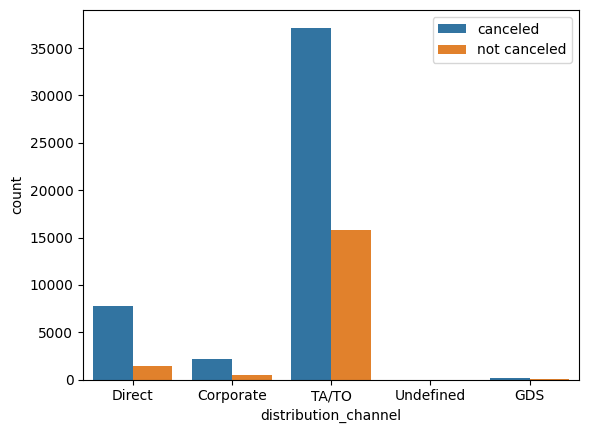

In [115]:
## Plotting countplot for distribution_channel and is_canceled.
## Legend -> describes the elements of a graph
sns.countplot(df,x="distribution_channel",hue="is_canceled")
plt.legend(['canceled','not canceled'])

* From above analysis we can see that for TA/TO the count of canceled and not_canceled is highest than any other distribution_channel and for undefined there none of the data can be seen.

In [116]:
## Using crosstab to compare the results for distribution_channel with the is_canceled column.
pd.crosstab(df["distribution_channel"], df["is_canceled"])

is_canceled,0,1
distribution_channel,,
Corporate,2160,472
Direct,7748,1425
GDS,141,32
TA/TO,37170,15815
Undefined,1,0


In [117]:
## Returns top 5 rows
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,booking_changes,customer_type,adr,reservation_status,reservation_status_date,month
0,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Direct,Direct,0,A,0,Transient,75.0,Check-Out,2015-02-07,2
1,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Corporate,Corporate,0,A,0,Transient,75.0,Check-Out,2015-02-07,2
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Online TA,TA/TO,0,A,0,Transient,98.0,Check-Out,2015-03-07,3
3,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,Direct,Direct,0,C,0,Transient,107.0,Check-Out,2015-03-07,3
4,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,Direct,Direct,0,C,0,Transient,103.0,Check-Out,2015-03-07,3


In [118]:
## Checking value_counts for top 10 lead time.
df["lead_time"].value_counts().head(10)

lead_time
0     4598
1     2424
2     1461
3     1307
4     1177
5     1074
6      978
7      926
8      812
11     728
Name: count, dtype: int64

<Axes: xlabel='is_canceled', ylabel='lead_time'>

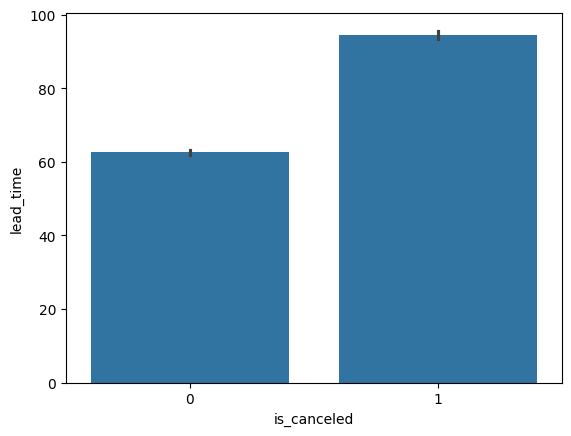

In [119]:
## Plotting bar plot for is_canceled(target column) and lead time column to find the relation between them.
sns.barplot(x = df["is_canceled"],y = df["lead_time"])

* From the above barplot we can analyse that count of lead time in not canceled is less than count of lead time in canceled.

In [120]:
## Returns all the unique values from hotel Column.
df["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [121]:
## Returns all the unique values from children Column.
df["children"].unique()

array([0., 1.])

In [122]:
## Returns all the unique values from adults Column.
df["adults"].unique()

array([1, 2, 0], dtype=int64)

In [123]:
## Checking value_counts for adults column.
df["adults"].value_counts()

adults
2    52941
1    11928
0       95
Name: count, dtype: int64

In [124]:
## Using crosstab to compare the results for is_canceled with stays_in_weekend_nights column.
pd.crosstab(df["is_canceled"], df["stays_in_weekend_nights"])

stays_in_weekend_nights,0,1,2,3,4
is_canceled,,,,,
0,19883,12849,14017,255,216
1,6701,4882,5907,153,101


In [125]:
## Using crosstab to compare the results for is_canceled with stays_in_week_nights column.
pd.crosstab(df["is_canceled"], df["stays_in_week_nights"])

stays_in_week_nights,0,1,2,3,4,5,6
is_canceled,,,,,,,
0,3978,13119,11504,8775,3999,5199,646
1,957,3834,4644,3710,1918,2297,384


In [126]:
## Checking value_counts for adults column.
df["children"].value_counts()

children
0.0    61416
1.0     3548
Name: count, dtype: int64

In [127]:
## Using crosstab to compare the results for is_canceled with children column.
pd.crosstab(df["is_canceled"], df["children"])

children,0.0,1.0
is_canceled,,
0,44773,2447
1,16643,1101


In [128]:
## Checking value_counts for market segment column.
df["market_segment"].value_counts()

market_segment
Online TA        40201
Offline TA/TO    10494
Direct            8433
Groups            3189
Corporate         2098
Complementary      406
Aviation           143
Name: count, dtype: int64

In [129]:
## Using crosstab to compare the results for is_canceled with market segment.
pd.crosstab(df["is_canceled"], df["market_segment"])

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA
is_canceled,,,,,,,
0,111,345,1730,7159,2285,8985,26605
1,32,61,368,1274,904,1509,13596


In [130]:
## Replacing Aviation with Other.
df["market_segment"].replace("Aviation", "Other", inplace=True)

In [131]:
## Checking value_counts for market segment column.
df["market_segment"].value_counts()

market_segment
Online TA        40201
Offline TA/TO    10494
Direct            8433
Groups            3189
Corporate         2098
Complementary      406
Other              143
Name: count, dtype: int64

In [132]:
## Creating a list of top 3 market segment 
top_market_seg = df["market_segment"].value_counts().head(3).index.tolist()

In [133]:
## Here we getting top three market segment
top_market_seg

['Online TA', 'Offline TA/TO', 'Direct']

* Adding Direct, Corporate, Complementary and Aviation in a single catergory named other, because as we can see above in value_counts very less data is present in this category therefore we add all those in single column.

In [134]:
## Using Lambda function to create a list with top 3 market segment and other segment to be added in Other
df["market_segment"]=list(map(lambda x: "Other" if x not in top_market_seg else x, df["market_segment"]))

In [135]:
## Checking value_counts for market segment column.
df["market_segment"].value_counts()

market_segment
Online TA        40201
Offline TA/TO    10494
Direct            8433
Other             5836
Name: count, dtype: int64

* Here we can see that we can only see top three market segment and rest of the market segment category are added in other.

In [136]:
## Using crosstab to compare the results for is_canceled with market segment.
pd.crosstab(df["is_canceled"], df["market_segment"])

market_segment,Direct,Offline TA/TO,Online TA,Other
is_canceled,,,,
0,7159,8985,26605,4471
1,1274,1509,13596,1365


In [137]:
## Checking value_counts for is_repeated_guest column.
df["is_repeated_guest"].value_counts() 

is_repeated_guest
0    64441
1      523
Name: count, dtype: int64

In [138]:
## Using crosstab to compare the results for is_canceled with is_repeated_guest column.
pd.crosstab(df["is_canceled"], df["is_repeated_guest"])

is_repeated_guest,0,1
is_canceled,,
0,46798,422
1,17643,101


In [139]:
## Returns information about the data frame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64964 entries, 0 to 64963
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   hotel                      64964 non-null  object        
 1   is_canceled                64964 non-null  int64         
 2   lead_time                  64964 non-null  int64         
 3   arrival_date_year          64964 non-null  int64         
 4   arrival_date_month         64964 non-null  object        
 5   arrival_date_week_number   64964 non-null  int64         
 6   arrival_date_day_of_month  64964 non-null  int64         
 7   stays_in_weekend_nights    64964 non-null  int64         
 8   stays_in_week_nights       64964 non-null  int64         
 9   adults                     64964 non-null  int64         
 10  children                   64964 non-null  float64       
 11  babies                     64964 non-null  int64         
 12  meal

In [140]:
## Checking value_counts for reserved_room_type column.
df["reserved_room_type"].value_counts()

reserved_room_type
A    46247
D    11946
E     4260
F     1074
B      623
G      501
C      228
H       80
L        4
P        1
Name: count, dtype: int64

In [141]:
## Using crosstab to compare the results for is_canceled with reserved_room_type column.
pd.crosstab(df["is_canceled"], df["reserved_room_type"])

reserved_room_type,A,B,C,D,E,F,G,H,L,P
is_canceled,,,,,,,,,,
0,33744,446,169,8494,3043,874,395,52,3,0
1,12503,177,59,3452,1217,200,106,28,1,1


In [142]:
## Checking value_counts for booking changes column.
df["booking_changes"].value_counts()

booking_changes
0    57125
1     7839
Name: count, dtype: int64

* From above value count data we can see that data is too biased towards 0 therefore we will this column.

In [143]:
## Checking value_counts for booking changes column.
df["customer_type"].value_counts()

customer_type
Transient          54208
Transient-Party     8182
Contract            2270
Group                304
Name: count, dtype: int64

In [144]:
## Using crosstab to compare the results for is_canceled with customer type column.
pd.crosstab(df["is_canceled"], df["customer_type"])

customer_type,Contract,Group,Transient,Transient-Party
is_canceled,,,,
0,1876,277,38250,6817
1,394,27,15958,1365


In [145]:
## Checking value_counts for adr column.
df["adr"].value_counts()

adr
0.00      1218
75.00     1062
85.00      747
48.00      727
65.00      696
          ... 
130.17       1
116.60       1
104.43       1
103.15       1
157.71       1
Name: count, Length: 6714, dtype: int64

In [146]:
## Checking value_counts for reservation_status column.
df["reservation_status"].value_counts()

reservation_status
Check-Out    47220
Canceled     16981
No-Show        763
Name: count, dtype: int64

In [147]:
## The describe() function gives the descriptive statistics of a dataset.
df["month"].describe()

count    64964.000000
mean         6.357967
std          3.332140
min          1.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         12.000000
Name: month, dtype: float64

In [148]:
## Returns information of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64964 entries, 0 to 64963
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   hotel                      64964 non-null  object        
 1   is_canceled                64964 non-null  int64         
 2   lead_time                  64964 non-null  int64         
 3   arrival_date_year          64964 non-null  int64         
 4   arrival_date_month         64964 non-null  object        
 5   arrival_date_week_number   64964 non-null  int64         
 6   arrival_date_day_of_month  64964 non-null  int64         
 7   stays_in_weekend_nights    64964 non-null  int64         
 8   stays_in_week_nights       64964 non-null  int64         
 9   adults                     64964 non-null  int64         
 10  children                   64964 non-null  float64       
 11  babies                     64964 non-null  int64         
 12  meal

In [149]:
### Dropping Columns which do not have any relation with target column. 
df.drop(["arrival_date_week_number", "arrival_date_day_of_month", "distribution_channel","is_repeated_guest", 
         "booking_changes","adr","reservation_status_date"], axis=1, inplace=True)

In [150]:
## Returns information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64964 entries, 0 to 64963
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hotel                    64964 non-null  object 
 1   is_canceled              64964 non-null  int64  
 2   lead_time                64964 non-null  int64  
 3   arrival_date_year        64964 non-null  int64  
 4   arrival_date_month       64964 non-null  object 
 5   stays_in_weekend_nights  64964 non-null  int64  
 6   stays_in_week_nights     64964 non-null  int64  
 7   adults                   64964 non-null  int64  
 8   children                 64964 non-null  float64
 9   babies                   64964 non-null  int64  
 10  meal                     64964 non-null  object 
 11  country                  64964 non-null  object 
 12  market_segment           64964 non-null  object 
 13  reserved_room_type       64964 non-null  object 
 14  customer_type         

In [151]:
## Checking value_counts for hotel column.
df["hotel"].value_counts()

hotel
City Hotel      40956
Resort Hotel    24008
Name: count, dtype: int64

In [152]:
## Converting city hotel to 0 and resort hotel to 1 
df["hotel"]=list(map(lambda x: 0 if x == "City Hotel" else 1, df["hotel"]))

In [153]:
##Rreturns unique values from the hotel column 
df["hotel"].unique()

array([1, 0], dtype=int64)

In [154]:
## Returns unique values from the arrival_date_month column 
df["arrival_date_month"].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [155]:
## Reset index is use to reset the index of the dataframe.
## Drop = True is set to true so that the replaced index column is not added to the data.
## Inplace = True is set to true so that the changes are made directly to the original DataFrame.
df.reset_index(drop=True, inplace=True)

In [156]:
## Returns information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64964 entries, 0 to 64963
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hotel                    64964 non-null  int64  
 1   is_canceled              64964 non-null  int64  
 2   lead_time                64964 non-null  int64  
 3   arrival_date_year        64964 non-null  int64  
 4   arrival_date_month       64964 non-null  object 
 5   stays_in_weekend_nights  64964 non-null  int64  
 6   stays_in_week_nights     64964 non-null  int64  
 7   adults                   64964 non-null  int64  
 8   children                 64964 non-null  float64
 9   babies                   64964 non-null  int64  
 10  meal                     64964 non-null  object 
 11  country                  64964 non-null  object 
 12  market_segment           64964 non-null  object 
 13  reserved_room_type       64964 non-null  object 
 14  customer_type         

* From the above information we can see that there are total 16 columns left after dropping some columns, no null values present in my data and range of my dataset is 89041.
* Also datatype can be seen as my 1 column has float datatype, 9 columns has integer datatype and 7 columns has object datatype.

In [157]:
## Using map function to convert object type of data to integer, giving jan ->1 , feb-> 2...vice versa..
df["arrival_date_month"] = df["arrival_date_month"].map({"January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6,
                                                                   "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12})

In [158]:
## Returns unique value after converting values into integer datatype.
df["arrival_date_month"].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6], dtype=int64)

In [159]:
## Returns unique values of the column market segment
df["market_segment"].unique()

array(['Direct', 'Other', 'Online TA', 'Offline TA/TO'], dtype=object)

In [161]:
## Converting values of market_segment to integer datatype using map function.
df["market_segment"] = df["market_segment"].map({"Online TA": 1, "Offline TA/TO": 2,"Direct": 3,"Other": 4})

In [162]:
## Returns unique value after converting values into integer datatype.
df["market_segment"].unique()

array([3, 4, 1, 2], dtype=int64)

In [163]:
## Returns unique values of the reserved_room_type column.
df["reserved_room_type"].unique()

array(['A', 'C', 'D', 'E', 'G', 'F', 'H', 'L', 'B', 'P'], dtype=object)

In [164]:
## Importing Label Encoder
from sklearn.preprocessing import LabelEncoder

In [165]:
## Creating a variable le to inherit functions of labelencoder
le = LabelEncoder()

In [166]:
## Fitting and tranforming data into label encoder
df["reserved_room_type"] = le.fit_transform(df["reserved_room_type"])

In [167]:
## Returns unique values of the column reserved room type after converting the data using label encoder
df["reserved_room_type"].unique()

array([0, 2, 3, 4, 6, 5, 7, 8, 1, 9])

In [168]:
## Returns data type of column reserved room type
df["reserved_room_type"].dtype

dtype('int32')

In [169]:
## Returns unique values of the column customer type
df["customer_type"].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [170]:
## Using map function to convert data into integer datatype, giving transient -> 0, contract->1 ..,vice versa..
df['customer_type'] = df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

In [171]:
## Returns unique value of the column customer type
df["customer_type"].unique()

array([0, 1, 2, 3], dtype=int64)

In [172]:
## Returns unique value of the column reservation status type
df["reservation_status"].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [173]:
## Using map function to convert data into integer datatype, giving check_out ->1.. vice-versa.,
df["reservation_status"] = df["reservation_status"].map({"Check-Out": 1, "Canceled": 2, "No-Show": 0 })

In [174]:
## Returns unique value of the column reservation status type after converting into integer data type
df["reservation_status"].unique()

array([1, 2, 0], dtype=int64)

In [175]:
## Checking value_counts for reservation status column.
df["reservation_status"].value_counts()

reservation_status
1    47220
2    16981
0      763
Name: count, dtype: int64

In [176]:
df.drop(["meal", "country"], axis=1, inplace= True)

In [177]:
## Returns information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64964 entries, 0 to 64963
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hotel                    64964 non-null  int64  
 1   is_canceled              64964 non-null  int64  
 2   lead_time                64964 non-null  int64  
 3   arrival_date_year        64964 non-null  int64  
 4   arrival_date_month       64964 non-null  int64  
 5   stays_in_weekend_nights  64964 non-null  int64  
 6   stays_in_week_nights     64964 non-null  int64  
 7   adults                   64964 non-null  int64  
 8   children                 64964 non-null  float64
 9   babies                   64964 non-null  int64  
 10  market_segment           64964 non-null  int64  
 11  reserved_room_type       64964 non-null  int32  
 12  customer_type            64964 non-null  int64  
 13  reservation_status       64964 non-null  int64  
 14  month                 

* From the above information we can see that there are total 16 columns left after dropping some columns, no null values present in my data and range of my dataset is 89041.
* Also datatype can be seen as my 1 column has float datatype, 13 columns has integer datatype.

In [178]:
df.isna().sum()

hotel                      0
is_canceled                0
lead_time                  0
arrival_date_year          0
arrival_date_month         0
stays_in_weekend_nights    0
stays_in_week_nights       0
adults                     0
children                   0
babies                     0
market_segment             0
reserved_room_type         0
customer_type              0
reservation_status         0
month                      0
dtype: int64

In [179]:
## Splitting input and output data as X and y resp.
X = df.drop("is_canceled", axis=1)
y = df["is_canceled"]

In [180]:
## Checking shape of the input columns
X.shape

(64964, 14)

In [181]:
## Checking shape of the output column
y.shape

(64964,)

#### Working with PCA -> Principal component analysis

In [182]:
## Importing PCA 
from sklearn.decomposition import PCA

In [183]:
## Using algorithem PCA, Taking n components as 6
pc = PCA(n_components=6)

In [184]:
# Fitting and transforming the model
new_data =pc.fit_transform(X) 

In [185]:
new_data

array([[-64.30671299,   2.63160549,  -3.50771993,  -1.4967768 ,
          0.55128223,   1.21883016],
       [-58.30805773,   2.63811736,  -3.49448577,  -1.56296884,
          0.70188249,   2.12460917],
       [-57.29649178,   1.9207491 ,  -2.84161061,  -0.89784421,
         -0.4864429 ,  -0.56340378],
       ...,
       [-48.2643392 ,  -0.8172434 ,  -1.4166317 ,   0.66821215,
         -3.14375018,   0.3278905 ],
       [-37.26305017,  -1.51719268,  -0.80008321,   3.27961724,
         -1.69612222,  -0.59313038],
       [ 37.7340459 ,  -1.33285861,  -0.552753  ,   0.41720031,
         -2.70475307,  -0.56164483]])

In [186]:
# Return components(eigen vectors)
pc.components_ 

array([[ 3.92611504e-05,  9.99962990e-01,  1.24801878e-03,
         3.53286332e-03,  2.79084604e-03,  6.90038047e-03,
         8.89256074e-04,  1.28803875e-04, -0.00000000e+00,
        -1.12267797e-03,  4.27268343e-05,  9.05474667e-04,
         1.21924315e-03,  4.45289159e-04],
       [-1.97031508e-03,  2.58035031e-03,  7.89019915e-02,
        -6.60547605e-01, -3.55582962e-03, -1.62458361e-03,
         1.26084840e-03,  2.19687993e-04,  0.00000000e+00,
        -8.97023173e-03,  3.06406688e-03, -8.06114802e-03,
         3.66148102e-03, -7.46495568e-01],
       [-3.61017886e-03,  2.30606464e-03,  9.25241304e-02,
        -7.40537683e-01,  3.87609338e-04, -1.29780438e-02,
        -3.21446374e-03, -1.73008548e-03,  1.08420217e-19,
        -6.02234990e-04, -2.47917867e-02,  4.48230467e-04,
        -7.92122064e-03,  6.64954905e-01],
       [ 9.39740409e-02, -3.66734176e-03,  9.36812905e-03,
        -1.85128165e-02,  1.29649968e-01,  4.72375475e-01,
         4.36609758e-02,  6.25974813e-03, -0.

In [187]:
## Importing train test split
from sklearn.model_selection import train_test_split

In [188]:
## Splitting data into train and test 
X_train, X_test, y_train, y_test = train_test_split(new_data, y, train_size=0.75, random_state=34)

In [189]:
## Checking shape of train input data
X_train.shape

(48723, 6)

In [190]:
## Checking shape of train output data
y_train.shape

(48723,)

In [191]:
## Importing Standard scaler
from sklearn.preprocessing import StandardScaler

In [192]:
## Applying standard scaler because data has numeric values which has significant diffrence.
scaler = StandardScaler()

In [193]:
## Scaling input train data using scaler function
X_train = scaler.fit_transform(X_train)

In [194]:
## Scaling input testing data using scaler function
## We only transform the test data 
X_test = scaler.transform(X_test)

In [195]:
## Importing LogisticRegression
# from sklearn.linear_model import LogisticRegression

### Logistic Regression

#### Using Logistic Regression to predict a outcome, on the basis of our dataset.

In [196]:
## Creating model for LogisticRegression
model = LogisticRegression()

In [197]:
## Fitting values in model
model.fit(X_train, y_train)

LogisticRegression()

In [198]:
## Checking model score/ training accuracy
model.score(X_train, y_train)

0.7347248732631406

In [199]:
## Predicting values 
y_pred = model.predict(X_test)

In [200]:
## Checking testing accuracy
accuracy_score(y_pred, y_test)

0.7364694292223385

In [201]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     15481
           1       0.10      0.60      0.18       760

    accuracy                           0.74     16241
   macro avg       0.54      0.67      0.51     16241
weighted avg       0.93      0.74      0.81     16241



In [202]:
confusion_matrix(y_pred, y_test)

array([[11507,  3974],
       [  306,   454]], dtype=int64)

#### Applying Decision Tree Classifier

In [203]:
## Creating a model for DecisionTreeClassifier to inherit properties of it.
model1 = DecisionTreeClassifier()

In [204]:
## Fitting training input and output data in the model.
model1.fit(X_train, y_train)

DecisionTreeClassifier()

In [205]:
## Checking model score by giving X_train and y_train
model1.score(X_train,y_train)

1.0

In [206]:
## Predicting values
y_pred1 = model1.predict(X_test)

In [207]:
## Checking accuracy score by giving 
accuracy_score(y_pred1, y_test)

0.8186688011821932

In [208]:
print(classification_report(y_pred1, y_test))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88     12012
           1       0.64      0.68      0.66      4229

    accuracy                           0.82     16241
   macro avg       0.76      0.77      0.77     16241
weighted avg       0.82      0.82      0.82     16241



In [209]:
confusion_matrix(y_pred1, y_test)

array([[10440,  1572],
       [ 1373,  2856]], dtype=int64)

* The confusion matrix for the  Logistic Regression shows:
* 10440 were correctly predicted as positive (true positives).
*  1572 were incorrectly predicted as positive (false Positive).
*  1373 were incorrectly predicted as negative (false Negative).
*  2856 were correctly predicted as negative (true negatives).


### DecisionTreeClassifier with criterion = entropy

In [210]:
## creating  DecisionTreeClassifier model on the basis of criterion="entropy", max_depth=4, max_features=4
model3 = DecisionTreeClassifier(criterion="entropy", max_depth=4, max_features=4)

In [211]:
## Fitting the model by giving X_train and y_train.
model3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=4)

In [212]:
## Checking score of the model.
model3.score(X_train, y_train)

0.7845576011329352

In [213]:
## Predicting values
y_pred3 = model3.predict(X_test)

In [214]:
## Checking Accuracy Score
accuracy_score(y_pred3, y_test)

0.7848038913859984

In [215]:
confusion_matrix(y_pred3, y_test)

array([[11240,  2922],
       [  573,  1506]], dtype=int64)

* The confusion matrix for the  Decision Tree Classifier shows:
* 11240 were correctly predicted as positive (true positives).
* 2922 were incorrectly predicted as positive (false Positive).
* 573 were incorrectly predicted as negative (false Negative).
* 1506 were correctly predicted as negative (true negatives).

#### Using Random Forest

In [216]:
## Creating RandomForestClassifier model on the basis of n_estimators=100, n_jobs=-1,criterion="entropy"
model4 = RandomForestClassifier(n_estimators=100, n_jobs=-1,criterion="entropy")

In [217]:
## Fitting data into the model by giving X_tain and y_train.
model4.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_jobs=-1)

In [218]:
## Checking model score
model4.score(X_train, y_train)

1.0

In [219]:
## Predicting values.
y_pred4 = model4.predict(X_test)

In [220]:
## Checking accuracy score
accuracy_score(y_pred4, y_test)

0.8728526568561049

In [221]:
confusion_matrix(y_pred4, y_test)

array([[11255,  1507],
       [  558,  2921]], dtype=int64)

* The confusion matrix for the RandomForestClassifier shows:
* 11255 were correctly predicted as positive (true positives).
* 1507 were incorrectly predicted as positive (false Positive).
* 558 were incorrectly predicted as negative (false Negative).
* 2921 were correctly predicted as negative (true negatives).

## Conclusion 
#### From above applied PCA on applied different alogorithms the data set we found best accuracy is in RandomForestClassifier.

### Train test split on earlier data set without PCA

In [222]:
## Performing train test split on data set without PCA
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.75, random_state=34)

In [223]:
## Scaling input train data using scaler function
X_tr = scaler.fit_transform(X_tr)

In [224]:
## Scaling input test data using scaler function
X_te = scaler.transform(X_te)

### Logistic Regression

In [225]:
## Creating model for LogisticRegression
model_a = LogisticRegression()

In [226]:
## fitting data into model by giving X_train & y_train
model_a.fit(X_tr, y_tr)

LogisticRegression()

In [227]:
## Checking model score
model_a.score(X_tr, y_tr)

0.9881370194774541

In [228]:
## Predicting values
y_pred_a = model_a.predict(X_te)

In [229]:
## Checking accuracy score
accuracy_score(y_pred_a, y_te)

0.9886090757958254

In [230]:
confusion_matrix(y_pred_a, y_te)

array([[11813,   185],
       [    0,  4243]], dtype=int64)

* The confusion matrix for the  Logistic Regression shows:
* 11813 were correctly predicted as positive (true positives).
*  185 were incorrectly predicted as positive (false Positive).
*  0  were incorrectly predicted as negative (false Negative).
*  4243 were correctly predicted as negative (true negatives).

### Decision Tree Classifier

In [231]:
## Creating a model for DecisionTreeClassifier
model_b = DecisionTreeClassifier()

In [232]:
## fitting data into the model by giving x_train and y_train
model_b.fit(X_tr, y_tr)

DecisionTreeClassifier()

In [233]:
## Checking model score
model_b.score(X_tr, y_tr)

1.0

In [234]:
## Predicting values
y_pred_b = model_b.predict(X_te)

In [235]:
## Checking accuracy score
accuracy_score(y_pred_b, y_te)

1.0

In [236]:
confusion_matrix(y_pred_b, y_te)

array([[11813,     0],
       [    0,  4428]], dtype=int64)

* The confusion matrix for the  Decision Tree Classifier shows:
* 11813 were correctly predicted as positive (true positives).
* 0 were incorrectly predicted as positive (false Positive).
* 0 were incorrectly predicted as negative (false Negative).
* 4428 were correctly predicted as negative (true negatives).


### Using Random Forest

* It is ensemble technique used for biased dataset.

In [237]:
## Creating a model for RandomForestClassifier and giving criterion as entropy
model_c = RandomForestClassifier(n_estimators=100, n_jobs=-1,criterion="entropy")

In [238]:
## Fitting data into the model by giving X_train and y_train
model_c.fit(X_tr, y_tr)

RandomForestClassifier(criterion='entropy', n_jobs=-1)

In [239]:
## Checking model score
model_c.score(X_tr, y_tr)

1.0

In [240]:
## Predicting values
y_pred_c = model_c.predict(X_te)

In [241]:
## Checking accuracy score 
accuracy_score(y_pred_c, y_te)

1.0

In [242]:
confusion_matrix(y_pred_c, y_te)

array([[11813,     0],
       [    0,  4428]], dtype=int64)

* The confusion matrix for the RandomForest classifier shows:
* 11813 were correctly predicted as positive (true positives).
* 0 were incorrectly predicted as positive (false Positive).
* 0 were incorrectly predicted as negative (false Negative).
* 4428 were correctly predicted as negative (true negatives).


### Using K- Nearest Neighbour 

* The K-Nearest Neighbors Classifier is  and likely being used to predict the outcome on the basis of our input. (e.g., canceled or not canceled) based on various features and predicts classification based on the nearest neighbors.


In [243]:
## Creating a model for KNeighborsClassifier.
knc = KNeighborsClassifier(n_neighbors=11)

In [244]:
## Fitting data into the model by giving X_train and y_train
knc.fit(X_tr,y_tr)

KNeighborsClassifier(n_neighbors=11)

In [245]:
## Checking model score
knc.score(X_tr, y_tr)

0.9963261703918067

In [246]:
## Predicting values
y_pred_d = knc.predict(X_te)

In [247]:
## Checking accuracy score 
accuracy_score(y_pred_d, y_te)

0.9950126223754695

In [248]:
confusion_matrix(y_pred_d, y_te)

array([[11813,    81],
       [    0,  4347]], dtype=int64)

* The confusion matrix for the KNN shows:
* 11812 were correctly predicted as positive (true positives).
* 0 were incorrectly predicted as positive (false Positive).
* 0 were incorrectly predicted as negative (false Negative).
* 4346 were correctly predicted as negative (true negatives).


### Using Ada Boost Classifier

* The Adaptive Boosting Classifier focuses on improving classification accuracy by iteratively adjusting its 
model based on misclassified instances.

In [249]:
## Creating a model for AdaBoostClassifier and giving estimator as model of decision tree classifier
adaboost = AdaBoostClassifier(estimator=model_b, n_estimators=500)

In [250]:
## Fitting data into the model by giving X_train and y_train
adaboost.fit(X_tr, y_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=500)

In [251]:
## Checking model score 
adaboost.score(X_tr, y_tr)

1.0

In [252]:
## Predicting values
y_predicted = adaboost.predict(X_te)

In [253]:
## Checking accuracy score 
accuracy_score(y_te, y_predicted)

1.0

In [254]:
confusion_matrix(y_te, y_predicted)

array([[11813,     0],
       [    0,  4428]], dtype=int64)

* The confusion matrix for the AdaBoostClassifier  shows:
* 11813 were correctly predicted as positive (true positives).
* 0 were incorrectly predicted as positive (false Positive).
* 0 were incorrectly predicted as negative (false Negative).
* 4428 were correctly predicted as negative (true negatives).


## Conclusion 
#### From different alogorithms applied on the data set we found that our accuracy for all the algorithms is approx 100%. 